# Tour and Travels Customer Churn 

By connecting people to a variety of places, cultures, and experiences, the tour and travel sector makes a substantial contribution to world economies.  It covers things like hotel, travel assistance, vacation packages, and transportation.  It provides individualized experiences that improve convenience and general satisfaction for both business and leisure tourists.


Travelers today have easy access to booking services, online reviews, and customized travel advice due to technological advancements and online resources.  Nonetheless, companies in the sector face difficulties including keeping clients, controlling varying demand, and adjusting to shifting traveler tastes.  Improving services, increasing customer happiness, and preserving long-term profitability all depend on understanding consumer behavior, especially the elements that lead to customer churn.

Businesses may identify the main causes of customer disengagement and put loyalty-boosting tactics into place by looking at the loss of clients in the tour and travel sector.  Businesses may make well-informed decisions to improve their services and maintain their competitiveness in the ever-changing travel industry by leveraging data analytics and machine learning.


This notebook presents an analysis of customer churn in the tour and travel industry, examining key factors affecting customer retention, including age, frequent flyer status, income class, selected services, social media account synchronization, and hotel bookings. By applying data cleaning, exploratory data analysis (EDA), and machine learning models, we aim to uncover patterns and predict churn. Through visualizations and statistical insights, this analysis provides a deeper understanding of customer behavior, helping businesses refine retention strategies and improve customer satisfaction.

In [1]:
#!pip install missingno

In [2]:
#!pip install xgboost

In [3]:
#!pip install catboost

In [4]:
# Load libraries and data

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [6]:
# Load the dataset

df = pd.read_csv('Customertravel.csv')

### Understanding the data

In [7]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


**The dataset includes information about:**


 1. **Age** - Represents the age of the customer in years.
 2. **FrequentFlyer** - Indicates whether the customer is enrolled in a frequent flyer program.
 3. **AnnualIncomeClass** - Represents the income category of the customer.
 4. **ServicesOpted** - Denotes the number of travel-related services the customer has chosen or availed.
 5. **AccountSyncedToSocialMedia** - Specifies whether the customer's account is linked to social media platforms.
 6. **BookedHotelOrNot** - Indicates whether the customer has booked a hotel through the travel agency.
 7. **Target** - The target variable for customer churn prediction. It indicates whether the customer has stopped using the travel agency’s services.
     
     - 1 - The customer has left(churned)
     - 0 - The customer stayed

In [8]:
df.shape

(954, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [10]:
df.columns.values

array(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype=object)

In [11]:
# Check for missing values

df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

The dataset has no missing values, ensuring completeness for analysis.

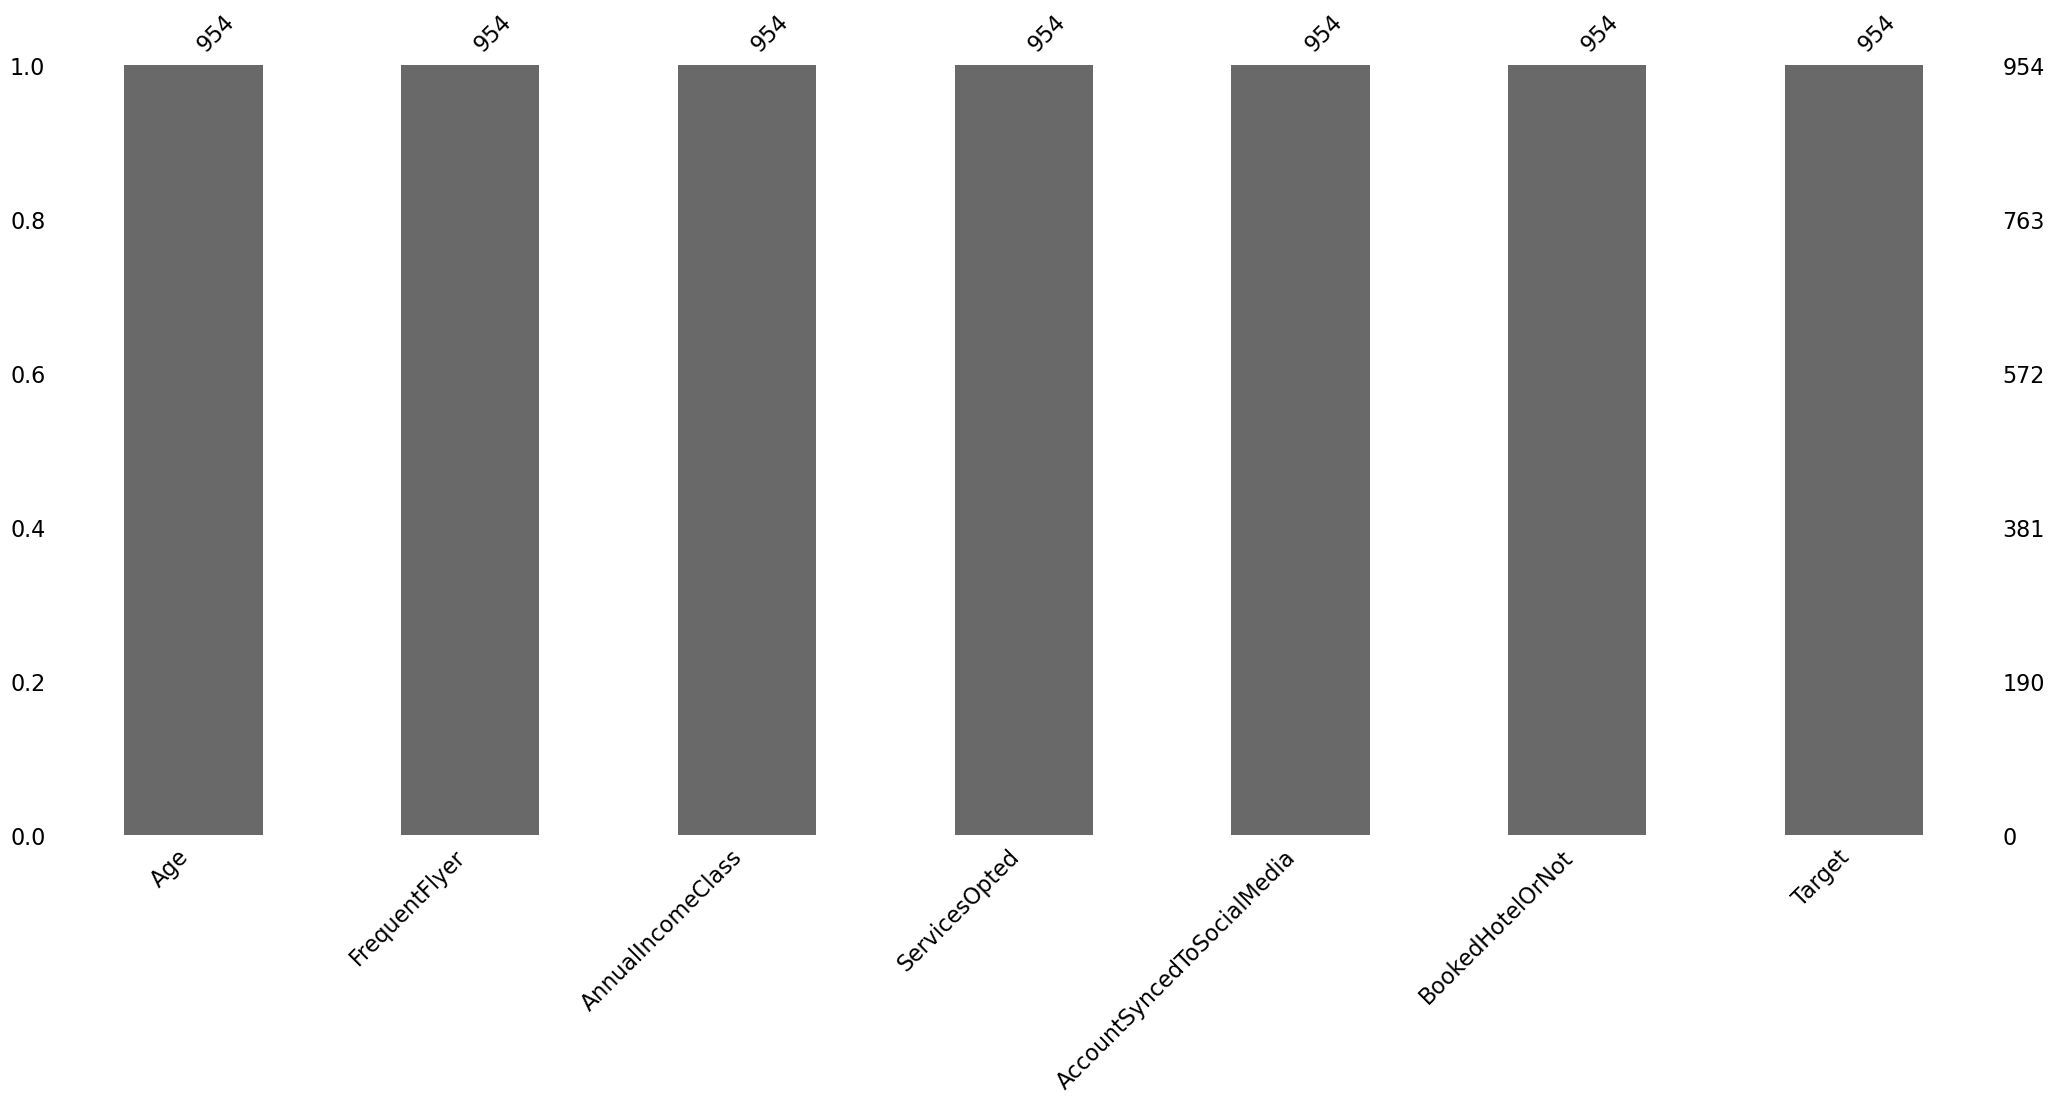

In [12]:
# Visualize missing values
msno.bar(df)
plt.show()

In [13]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


### Basic EDA

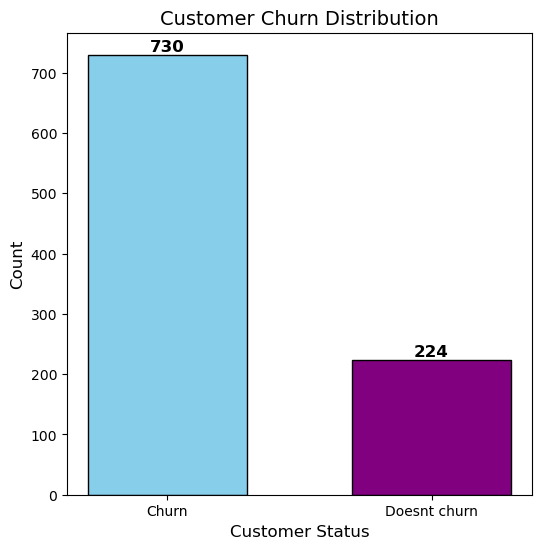

In [14]:
# Count values for the target variable
churn_counts = df['Target'].value_counts()

# Define labels
labels = ['Churn', 'Doesnt churn']

# Plot bar chart
plt.figure(figsize=(6,6))
plt.bar(labels, churn_counts, color=['skyblue', 'purple'], edgecolor='black', width=0.6)

# Add labels and title
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Customer Churn Distribution", fontsize=14)

# Show count values on bars
for i, count in enumerate(churn_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.show()

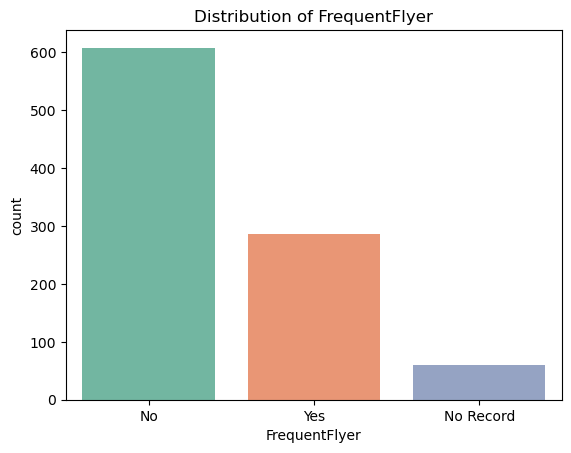

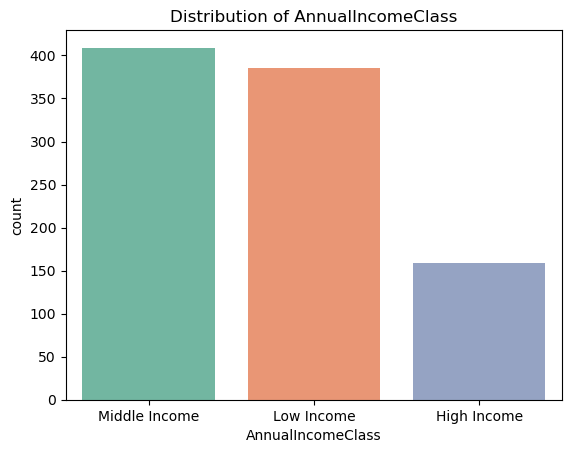

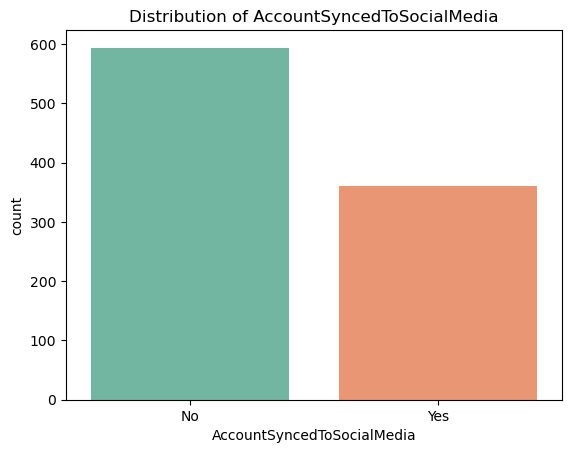

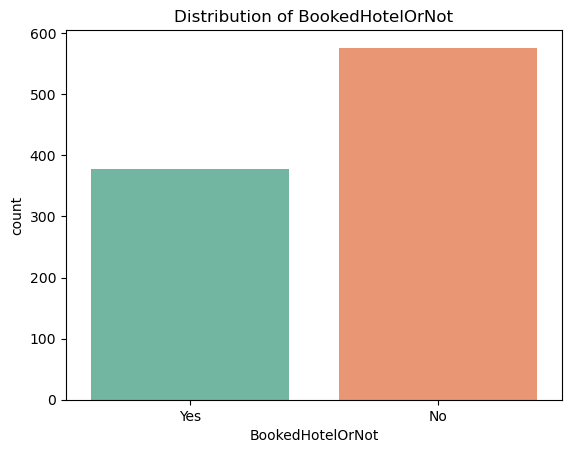

In [15]:
# Visualizing categorical features
categorical_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']
for col in categorical_cols:
    sns.countplot(x=df[col], palette = 'Set2')
    plt.title(f'Distribution of {col}')
    plt.show()

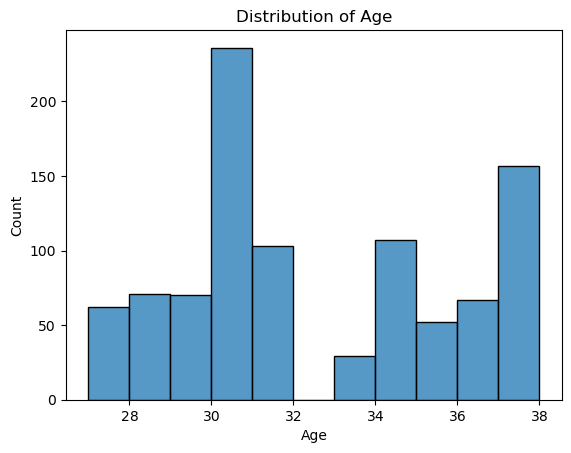

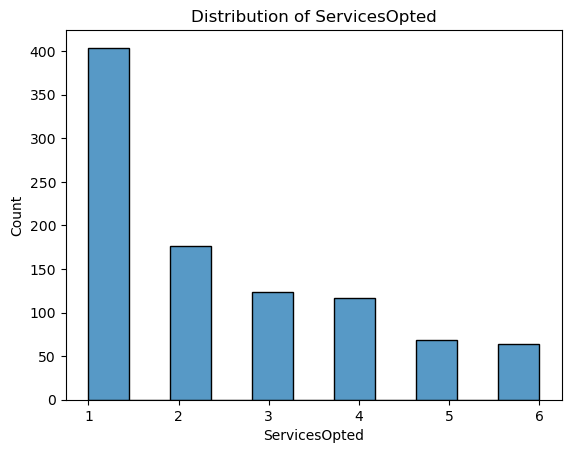

In [16]:
# Visualizing numerical features
numerical_cols = ['Age', 'ServicesOpted']
for col in numerical_cols:
    sns.histplot(df[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.show()

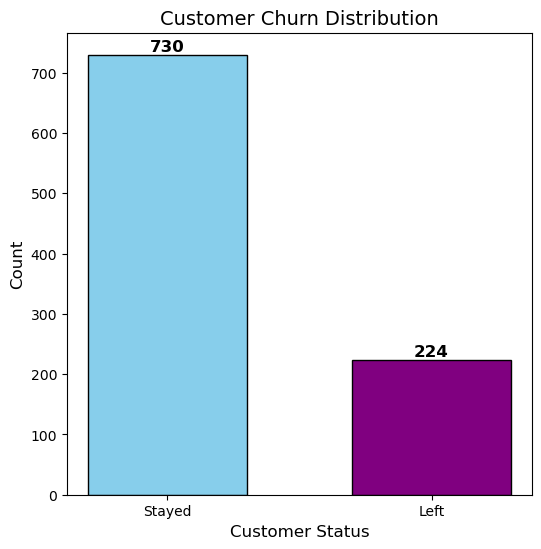

In [17]:
# Count values for the target variable
churn_counts = df['Target'].value_counts()

# Define labels
labels = ['Stayed', 'Left']

# Plot bar chart
plt.figure(figsize=(6,6))
plt.bar(labels, churn_counts, color=['skyblue', 'purple'], edgecolor='black', width=0.6)

# Add labels and title
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Customer Churn Distribution", fontsize=14)

# Show count values on bars
for i, count in enumerate(churn_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.show()

  FrequentFlyer     Target
0            No  11.348684
1     No Record  13.333333
2           Yes  51.398601


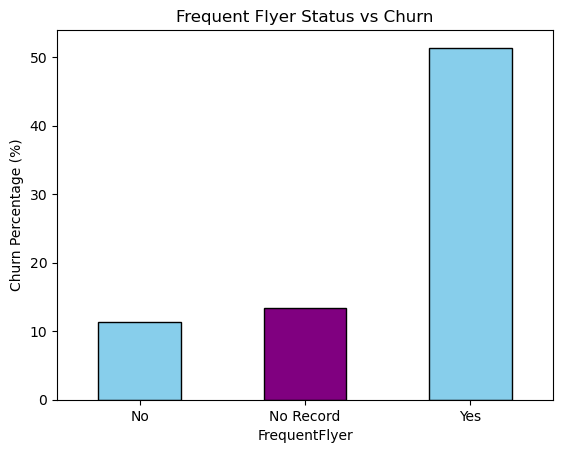

In [18]:
# FrequentFlyer - Check how the "frequent flyer" status affects the probability of churn:
churn_by_frequent_flyer = (df.groupby('FrequentFlyer')['Target'].mean() * 100).reset_index()
print(churn_by_frequent_flyer)

df.groupby('FrequentFlyer')['Target'].mean().mul(100).plot(kind='bar', color=['skyblue', 'purple'], edgecolor='black')
plt.ylabel("Churn Percentage (%)")
plt.title("Frequent Flyer Status vs Churn")
plt.xticks(rotation = 0)
plt.show()

  AnnualIncomeClass     Target
0       High Income  57.861635
1        Low Income  26.943005
2     Middle Income   6.845966


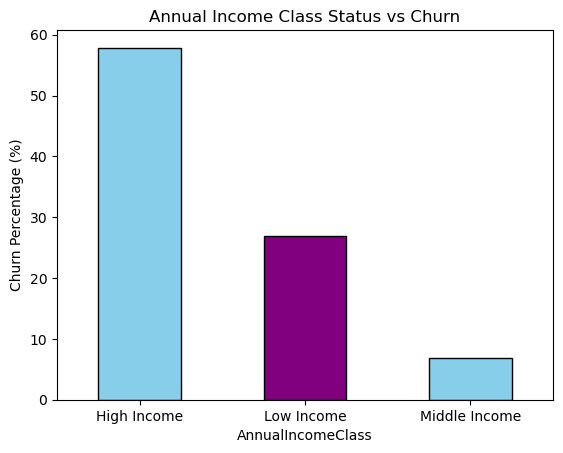

In [19]:
# AnnualIncomeClass - Check how the income class affects the probability of churn:
churn_by_income = (df.groupby('AnnualIncomeClass')['Target'].mean() * 100).reset_index()
print(churn_by_income)

df.groupby('AnnualIncomeClass')['Target'].mean().mul(100).plot(kind='bar', color=['skyblue', 'purple'], edgecolor='black')
plt.ylabel("Churn Percentage (%)")
plt.title("Annual Income Class Status vs Churn")
plt.xticks(rotation = 0)
plt.show()

   ServicesOpted     Target
0              1  23.019802
1              2  29.545455
2              3   8.064516
3              4  18.803419
4              5  37.681159
5              6  32.812500


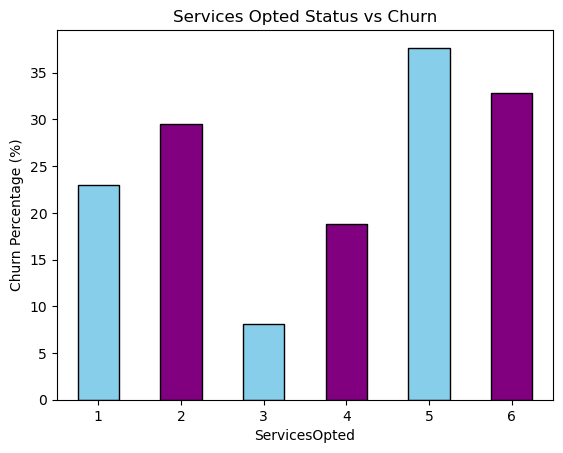

In [20]:
# ServicesOpted - Check how the number of selected services affects the probability of churn:
churn_by_services = (df.groupby('ServicesOpted')['Target'].mean() * 100).reset_index()
print(churn_by_services)

df.groupby('ServicesOpted')['Target'].mean().mul(100).plot(kind='bar', color=['skyblue', 'purple'], edgecolor='black')
plt.ylabel("Churn Percentage (%)")
plt.title("Services Opted Status vs Churn")
plt.xticks(rotation = 0)
plt.show()

  AccountSyncedToSocialMedia     Target
0                         No  21.043771
1                        Yes  27.500000


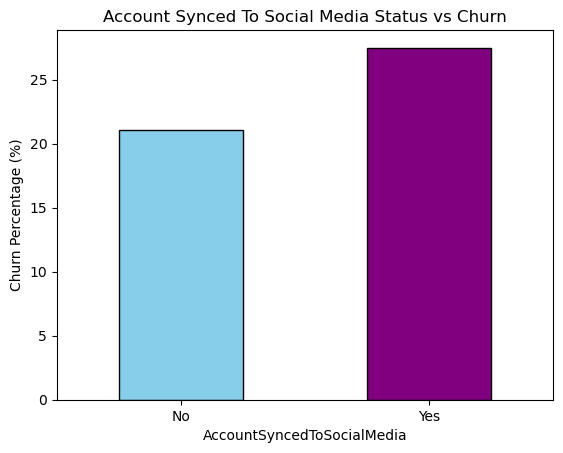

In [21]:
# AccountSyncedToSocialMedia - Check whether syncing an account with social media affects churn:
churn_by_sync = (df.groupby('AccountSyncedToSocialMedia')['Target'].mean() * 100).reset_index()
print(churn_by_sync)

df.groupby('AccountSyncedToSocialMedia')['Target'].mean().mul(100).plot(kind='bar', color=['skyblue', 'purple'], edgecolor='black')
plt.ylabel("Churn Percentage (%)")
plt.title("Account Synced To Social Media Status vs Churn")
plt.xticks(rotation = 0)
plt.show()

  BookedHotelOrNot     Target
0               No  30.555556
1              Yes  12.698413


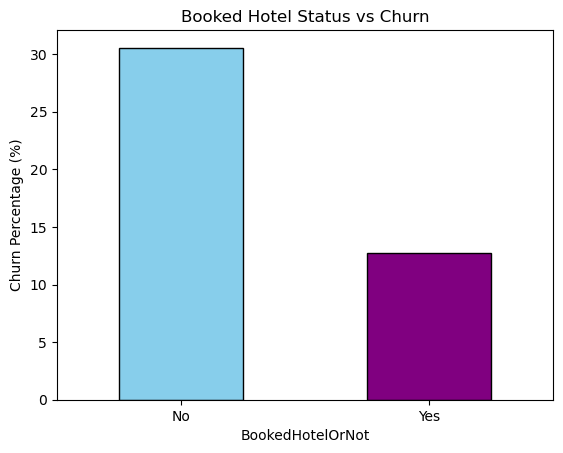

In [22]:
# BookedHotelOrNot - Check whether booking a hotel affects churn:
churn_by_hotel = (df.groupby('BookedHotelOrNot')['Target'].mean() * 100).reset_index()
print(churn_by_hotel)

df.groupby('BookedHotelOrNot')['Target'].mean().mul(100).plot(kind='bar', color=['skyblue', 'purple'], edgecolor='black')
plt.ylabel("Churn Percentage (%)")
plt.title("Booked Hotel Status vs Churn")
plt.xticks(rotation = 0)
plt.show()

### Data Preprocessing

In [23]:
# Encoding binary categorical variables
binary_cols = ['FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

# Mapping values
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0, 'No Record': -1})  # Assigning -1 for "No Record"
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].map({'Yes': 1, 'No': 0})
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].map({'Yes': 1, 'No': 0})

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()
df['AnnualIncomeClass'] = label_encoder.fit_transform(df['AnnualIncomeClass'])

In [25]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,1,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [26]:
# Define features and Target
X = df.drop(columns=['Target'])
Y = df['Target']

### Machine learning

In [27]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40, stratify = Y)

In [28]:
results = {
    "Model": [],
    "Accuracy": []
}

In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical feautures
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [30]:
# Logistic Regression

# Initialize Logistic Regression
log_reg = LogisticRegression()  
# Train the model
log_reg.fit(X_train, Y_train)  
# Make predictions
Y_pred_log_reg = log_reg.predict(X_test)  

results["Model"].append("Logistic Regression")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_log_reg))

In [31]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

results["Model"].append("Random Forest")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_rf))

In [32]:
# XGB

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

results["Model"].append("XGBoost")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_xgb))

In [33]:
# Support Vector Classification

svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, Y_train)
Y_pred_svm = svc_model.predict(X_test)

results["Model"].append("SVC")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_svm))

In [34]:
# KNN

knn_model= KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

results["Model"].append("k-NN")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_knn))

In [35]:
# Neutral Network

mlp_model = MLPClassifier(random_state=42, max_iter=1000)
mlp_model.fit(X_train, Y_train)
Y_pred_mlp = mlp_model.predict(X_test)

results["Model"].append("Neural Network")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_mlp))

In [36]:
# CatBoost

catboost_model = CatBoostClassifier(random_state=42, iterations=100, learning_rate=0.1, depth=6, verbose=False)
catboost_model.fit(X_train, Y_train)
Y_pred_catboost = catboost_model.predict(X_test)

results["Model"].append("CatBoost")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_catboost))

In [37]:
# AdaBoost 

ada_model = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
ada_model.fit(X_train, Y_train)
Y_pred_ada = ada_model.predict(X_test)

results["Model"].append("AdaBoost")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_ada))

In [38]:
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, Y_train)
Y_pred_tree = dt_model.predict(X_test)

results["Model"].append("Decision Tree")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_tree))

In [39]:
# Extra Trees Classifier

extra_trees_model = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=5)
extra_trees_model.fit(X_train, Y_train)
Y_pred_extra_trees = extra_trees_model.predict(X_test)

results["Model"].append("Extra Trees")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_extra_trees))

In [40]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy
0,CatBoost,0.881533
1,k-NN,0.874564
2,Random Forest,0.867596
3,Neural Network,0.864111
4,XGBoost,0.857143
5,SVC,0.829268
6,Extra Trees,0.822300
7,Decision Tree,0.808362
8,Logistic Regression,0.804878
9,AdaBoost,0.804878
